In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import pickle

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [126]:
# ProfileReport(df)

In [5]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [8]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [10]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [128]:
# ProfileReport(df)

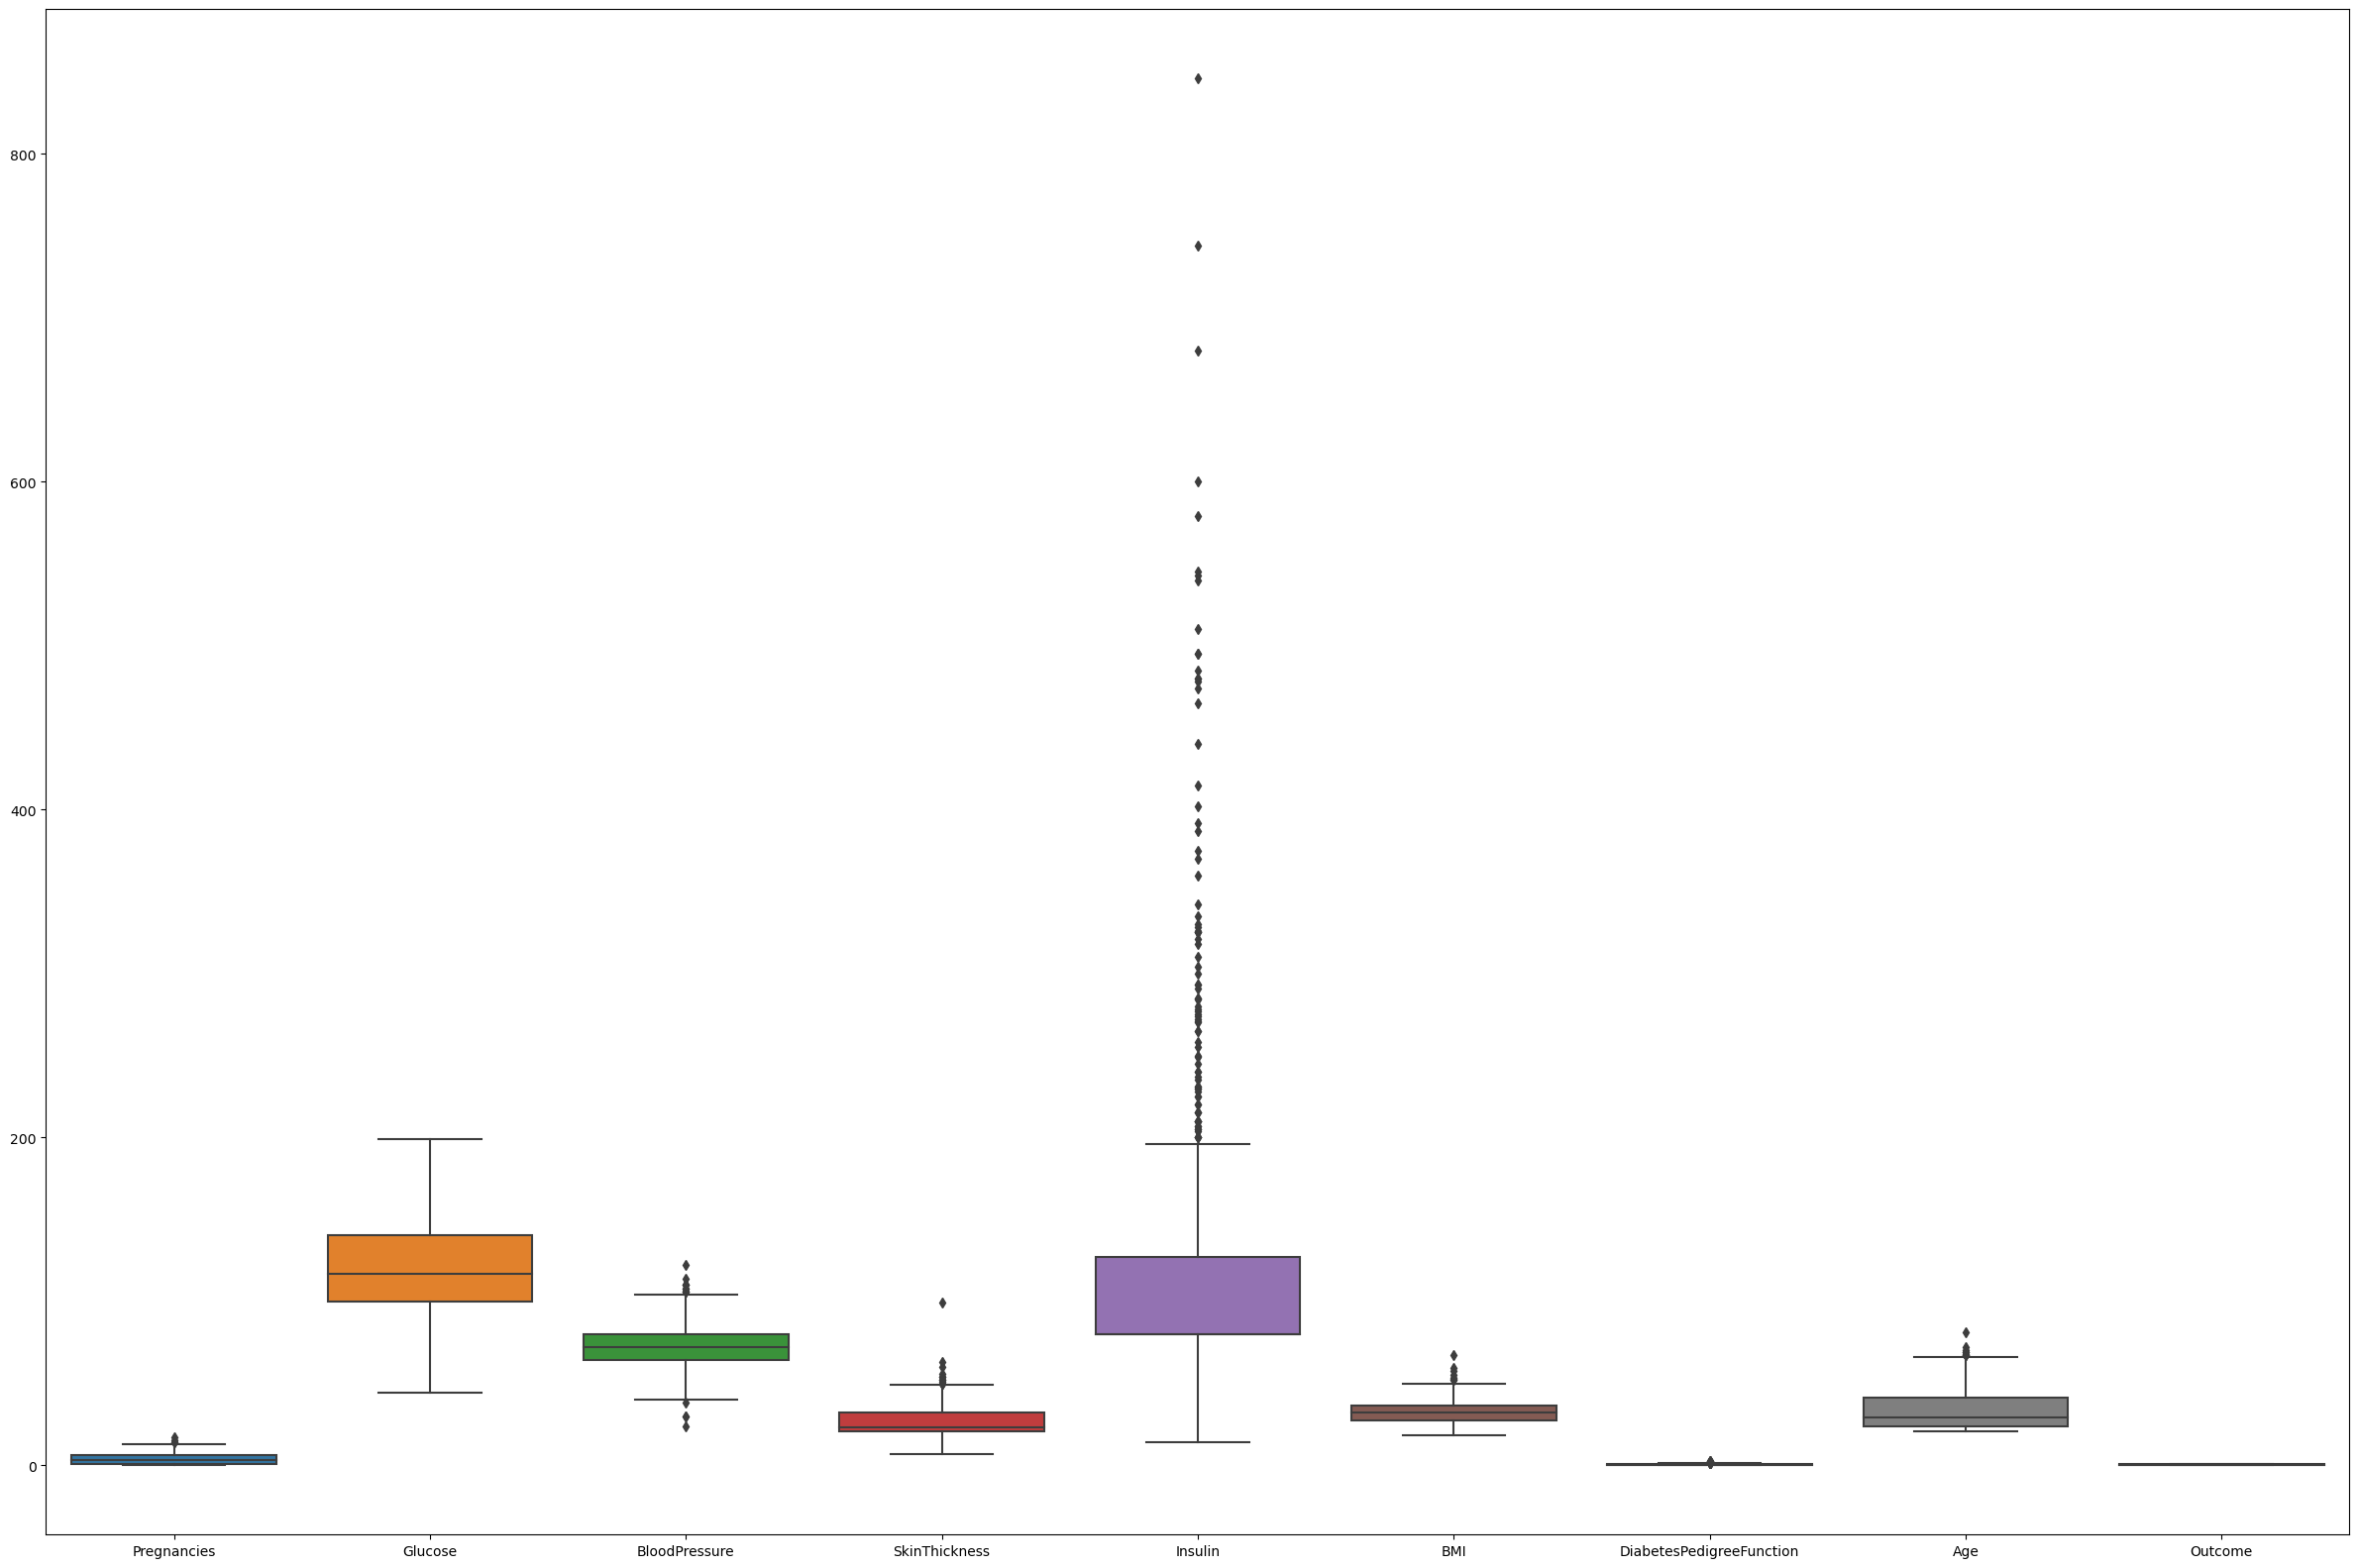

In [16]:
fig,ax=plt.subplots(figsize=(30,20))
sns.boxplot(data=df,ax=ax)
plt.show()

In [24]:
q=df['Insulin'].quantile(.70)
df_new=df[df['Insulin']<q]

In [25]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.000000,79.799479,44.0,0.403,43,1
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


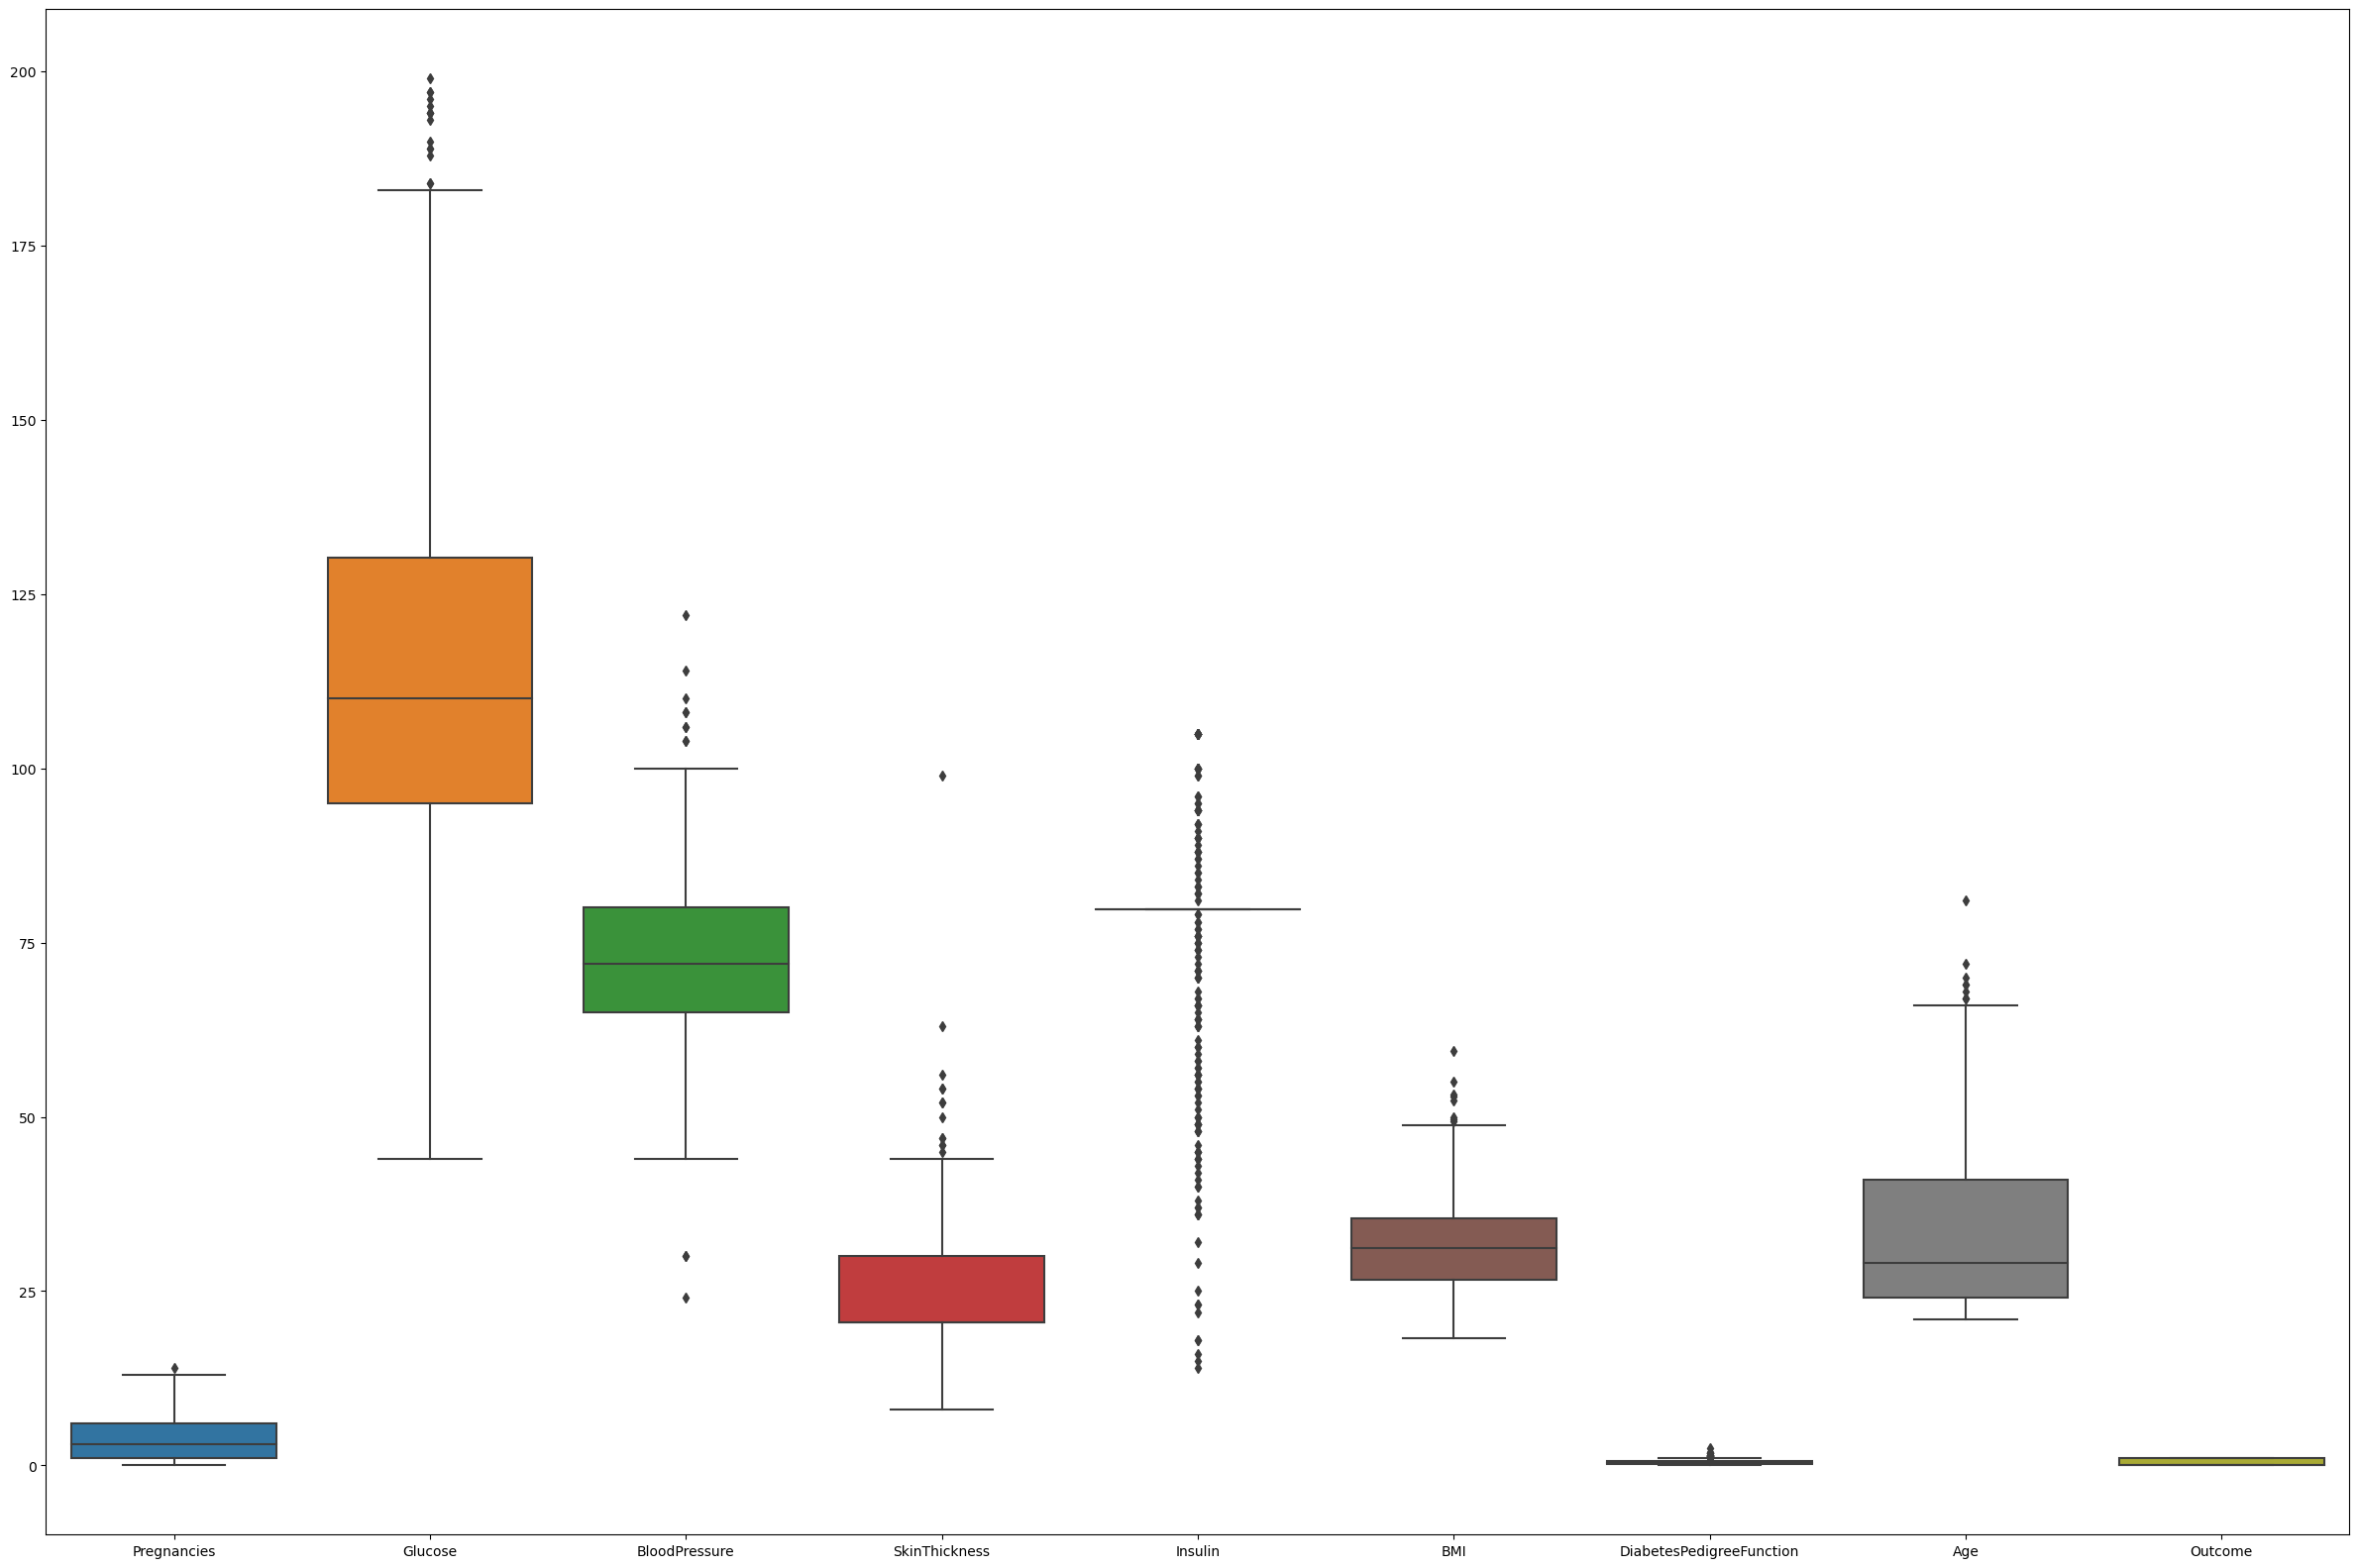

In [26]:
fig,ax=plt.subplots(figsize=(30,20))
sns.boxplot(data=df_new,ax=ax)
plt.show()

In [51]:
q=df['Pregnancies'].quantile(.98)
df_new=df[df['Pregnancies']<q]

q=df_new['BMI'].quantile(.99)
df_new=df_new[df_new['BMI']<q]

q=df_new['SkinThickness'].quantile(.99)
df_new=df_new[df_new['SkinThickness']<q]

q=df_new['Insulin'].quantile(.95)
df_new=df_new[df_new['Insulin']<q]

q=df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new=df_new[df_new['DiabetesPedigreeFunction']<q]

q=df_new['Age'].quantile(.99)
df_new=df_new[df_new['Age']<q]

# def outlier_removal(self,data):
#     def outlier_limits(col):
#         Q3,Q1=np.nanpercentile(col,[75,25])
#         IQR=Q3-Q1
#         UL=Q3+1.5*IQR
#         LL=Q1-1.5*IQR
#         return UL,LL
#     for column in data.columns:
#         if data[column].dtype != 'int64' :
#             UL,LL=outlier_limits(data[column])
#             data[column]=np.where((data[column] > UL | (data[column]) < LL), np.nan, data[column])
        
#     return data

In [ ]:
def outlier_removal(self,data):
    def outlier_limits(col):
        Q3,Q1=np.nanpercentile(col,[75,25])
        IQR=Q3-Q1
        UL=Q3+1.5*IQR
        LL=Q1-1.5*IQR
        return UL,LL
    for column in data.columns:
        if data[column].dtype != 'int64' :
            UL,LL=outlier_limits(data[column])
            data[column]=np.where((data[column] > UL | (data[column]) < LL), np.nan, data[column])
        
    return data

In [52]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


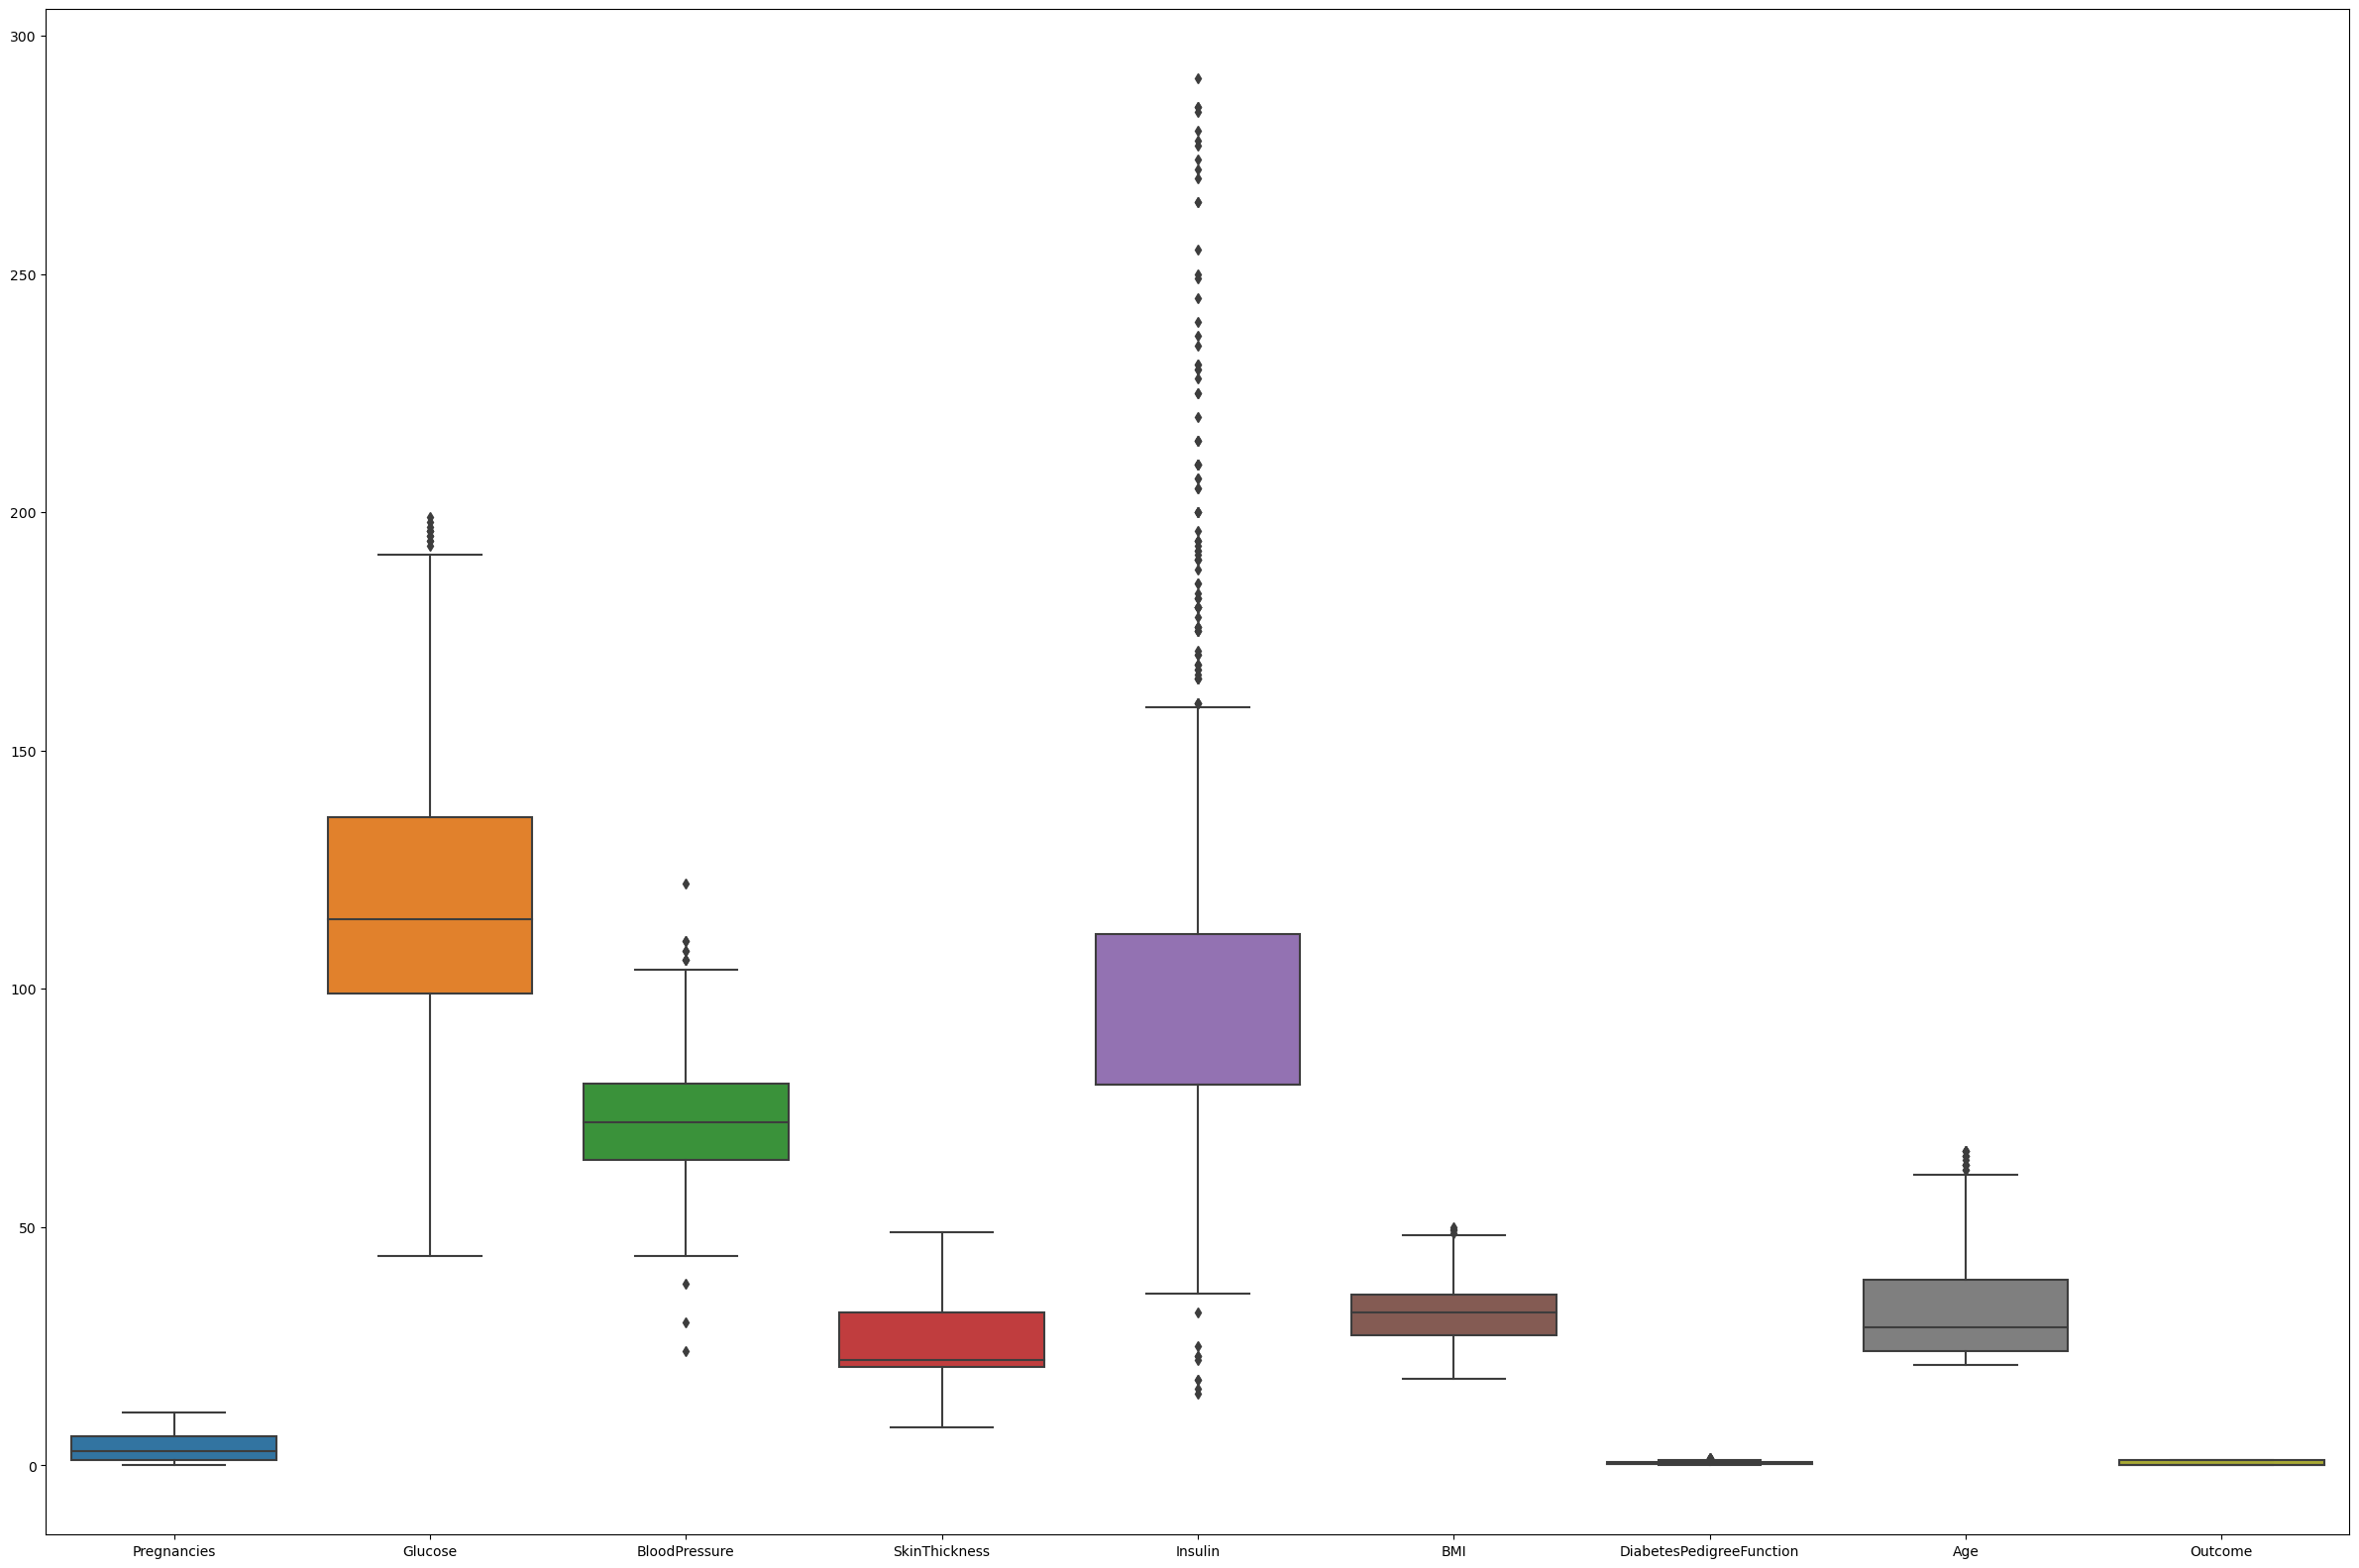

In [53]:
fig,ax=plt.subplots(figsize=(30,20))
sns.boxplot(data=df_new,ax=ax)
plt.show()

In [129]:
# ProfileReport(df_new)

In [55]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [56]:
y=df_new['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [57]:
x=df_new.drop(columns='Outcome')

In [58]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [59]:
scalar=StandardScaler()

In [130]:
# ProfileReport(pd.DataFrame(scalar.fit_transform(df_new)))

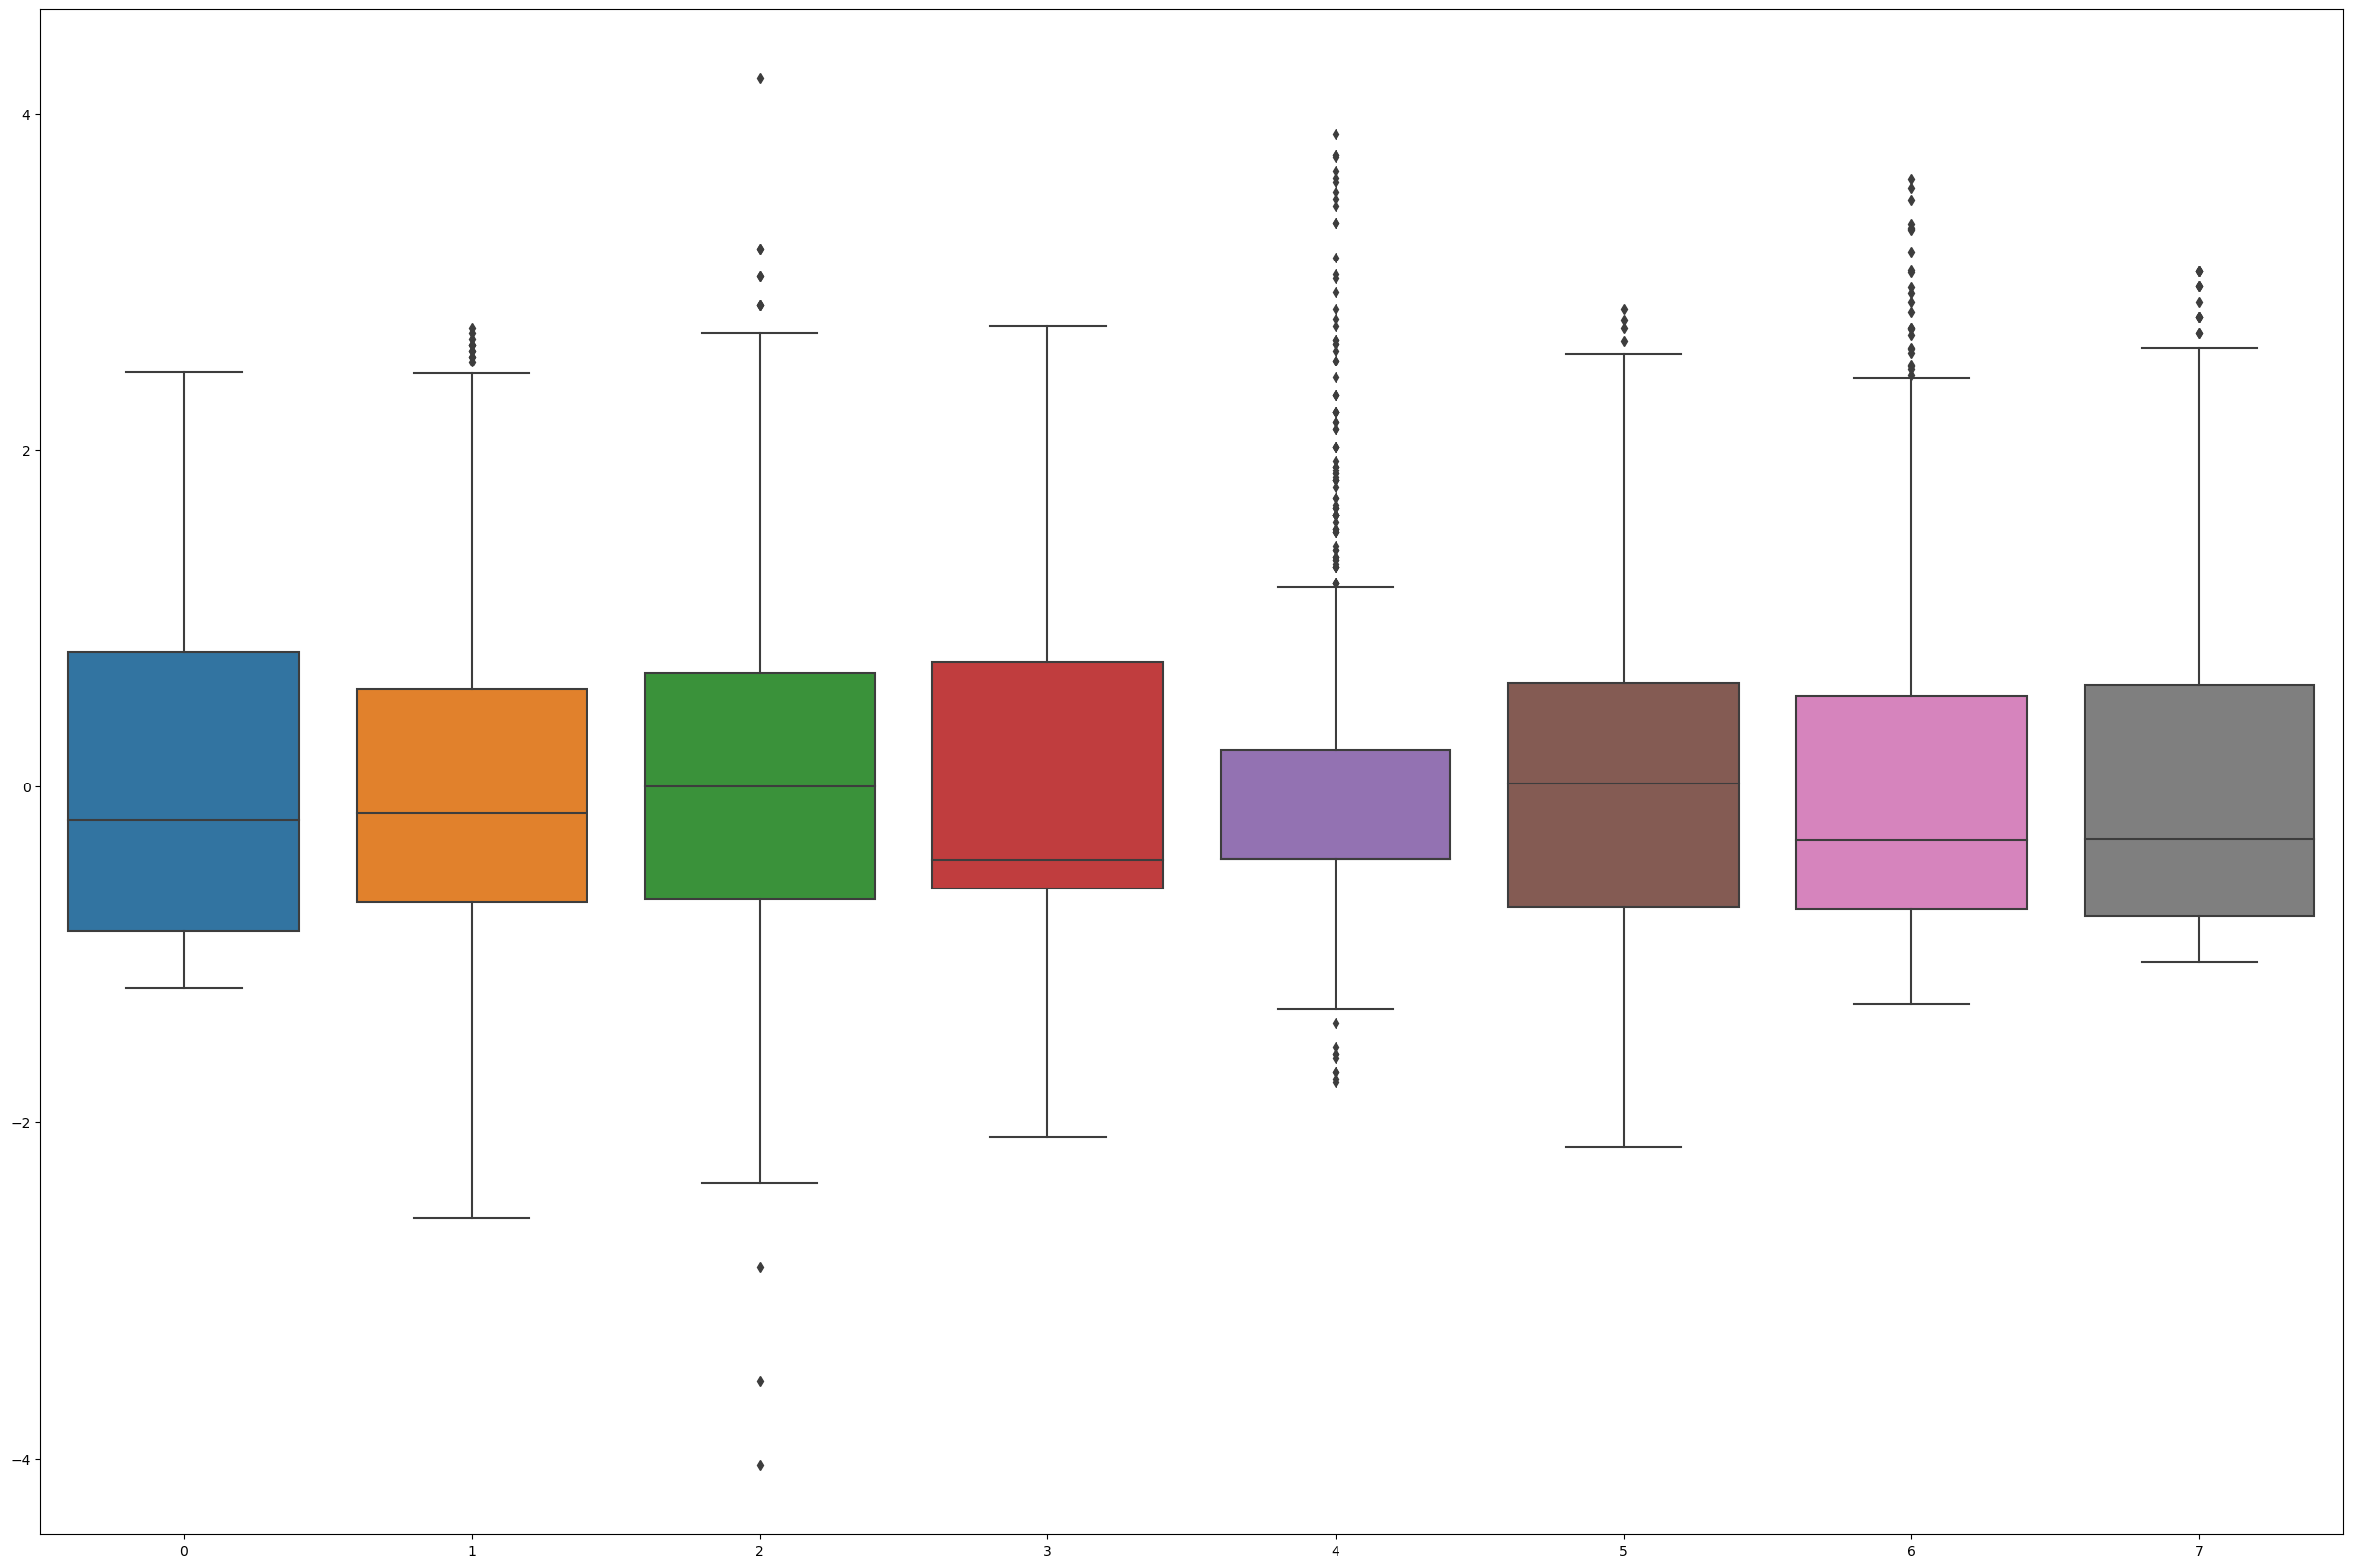

In [64]:

df_new_scalar=pd.DataFrame(scalar.fit_transform(x))
x_scaled=scalar.fit_transform(x)
fig,ax=plt.subplots(figsize=(30,20))
sns.boxplot(data=df_new_scalar,ax=ax)
plt.show()

In [65]:
x_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [69]:
def vif_score(x):
    scaler=StandardScaler()
    arr=scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE","VIF_SCORE"])

In [70]:
vif_score(x)

,FEATURE,VIF_SCORE
0,Pregnancies,1.449056
1,Glucose,1.304263
2,BloodPressure,1.262686
3,SkinThickness,1.470049
4,Insulin,1.271017
5,BMI,1.513160
6,DiabetesPedigreeFunction,1.042300
7,Age,1.662728


In [74]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size = .20 , random_state = 144)

In [75]:
x_train

array([[-0.86479354,  0.19769063, -1.85094678, ...,  0.21879402,
         1.80609569, -0.40651517],
       [ 2.45830136,  1.22329076,  0.33707068, ...,  0.21879402,
         3.1782269 ,  1.69268475],
       [ 0.13213493,  0.91561072,  1.09446134, ..., -0.47091521,
        -0.90658316, -0.49778473],
       ...,
       [-0.86479354, -0.28092276,  1.17861586, ..., -0.28281269,
        -1.06801036, -0.86286298],
       [ 1.46137289,  0.02675728,  0.50537972, ..., -1.08224839,
        -0.13454002,  2.87918905],
       [-0.86479354, -0.75953616, -0.33616546, ..., -0.73739378,
         2.27283086, -0.95413254]])

In [76]:
x_test

array([[ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, ...,
        -4.70915211e-01, -2.50346495e-01,  1.23633694e+00],
       [-1.19710303e+00,  6.76304024e-01, -8.41092564e-01, ...,
        -1.53682948e+00, -8.43415997e-01, -1.04540210e+00],
       [ 2.45830136e+00,  8.13050708e-01,  1.85185200e+00, ...,
         7.36075942e-01, -6.78479508e-01,  1.69268475e+00],
       ...,
       [ 7.96753910e-01, -5.54416131e-01, -5.04474494e-01, ...,
        -1.19197486e+00, -6.96025943e-01, -3.15245608e-01],
       [-5.32484049e-01, -1.20396288e+00, -2.43135269e-01, ...,
         1.38528976e-02, -5.03015158e-01, -1.04540210e+00],
       [-8.64793539e-01, -1.64838960e+00, -2.01925581e+00, ...,
        -1.80330804e+00, -4.36338705e-01, -9.54132539e-01]])

In [81]:
x_test[0]

array([ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, -6.09921498e-01,
       -4.34192020e-01, -4.70915211e-01, -2.50346495e-01,  1.23633694e+00])

In [79]:
logr=LogisticRegression(verbose=1)

In [80]:
logr.fit(x_train,y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73606D+02    |proj g|=  1.30987D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     11     12      1     0     0   5.866D-04   2.285D+02
  F =   228.47095901243759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [84]:
logr.predict_proba([x_test[0]])

array([[0.83549024, 0.16450976]])

In [103]:
y=logr.predict([x_test[0]])

In [86]:
logr.predict_log_proba([x_test[0]])

array([[-0.17973662, -1.80478536]])

In [87]:
y_test.iloc[0]

1

In [88]:
logr_lib=LogisticRegression(verbose=1,solver='liblinear')

In [89]:
logr=LogisticRegression(verbose=1)

In [92]:
logr.fit(x_train,y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73606D+02    |proj g|=  1.30987D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     11     12      1     0     0   5.866D-04   2.285D+02
  F =   228.47095901243759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [93]:
logr_lib

LogisticRegression(solver='liblinear', verbose=1)

In [96]:
logr_lib.fit(x_train,y_train)

[LibLinear]iter  1 act 1.290e+02 pre 1.158e+02 delta 1.320e+00 f 3.736e+02 |g| 2.223e+02 CG   2
iter  2 act 1.450e+01 pre 1.265e+01 delta 1.320e+00 f 2.446e+02 |g| 4.988e+01 CG   3
iter  3 act 1.028e+00 pre 9.704e-01 delta 1.320e+00 f 2.301e+02 |g| 1.102e+01 CG   3
iter  4 act 1.170e-02 pre 1.163e-02 delta 1.320e+00 f 2.290e+02 |g| 1.181e+00 CG   2
iter  5 act 5.530e-05 pre 5.528e-05 delta 1.320e+00 f 2.290e+02 |g| 1.031e-01 CG   2
iter  6 act 8.867e-07 pre 8.866e-07 delta 1.320e+00 f 2.290e+02 |g| 8.266e-03 CG   3


LogisticRegression(solver='liblinear', verbose=1)

In [97]:
logr

LogisticRegression(verbose=1)

In [99]:
y_pred_lib=logr_lib.predict(x_test)

In [100]:
y_pred_lib

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [107]:
y_pred_default = logr.predict (x_test)

In [108]:
confusion_matrix(y_test,y_pred_default)

array([[77, 10],
       [24, 24]])

In [112]:
def model_eval(y_true,y_pred):
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_score=2*(recall*precision)/(recall+precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,"Specificity":specificity,"F1_score":F1_score}
    return result
model_eval(y_test,y_pred_lib)

{'Accuracy': 0.7481481481481481,
 'Precision': 0.7058823529411765,
 'Recall': 0.5,
 'Specificity': 0.8850574712643678,
 'F1_score': 0.5853658536585366}

In [113]:
model_eval(y_test,y_pred_default)

{'Accuracy': 0.7481481481481481,
 'Precision': 0.7058823529411765,
 'Recall': 0.5,
 'Specificity': 0.8850574712643678,
 'F1_score': 0.5853658536585366}

In [115]:
roc_auc_score (y_test,y_pred_lib)

0.692528735632184

In [123]:
auc=roc_auc_score (y_test,y_pred_default)
auc

0.692528735632184

In [124]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_lib)

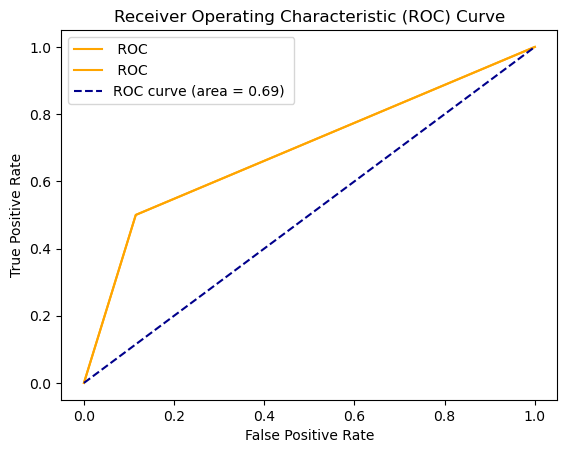

In [125]:
plt.plot(fpr, tpr, color='orange', label=' ROC')
plt.plot ([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f) ' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt. legend()
plt.show()